In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Student_Performance.csv")
df['Motivation'] = df['Hours Studied'] * 0.4 + df['Previous Scores'] * 0.3 + df['Sleep Hours'] * 0.05+ df['Sample Question Papers Practiced'] * 0.05
print(df)
df.info()
df.describe()

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 7               99                        Yes            9   
1                 4               82                         No            4   
2                 8               51                        Yes            7   
3                 5               52                        Yes            5   
4                 7               75                         No            8   
...             ...              ...                        ...          ...   
9995              1               49                        Yes            4   
9996              7               64                        Yes            8   
9997              6               83                        Yes            8   
9998              9               97                        Yes            7   
9999              7               74                         No            8   

      Sample Question Papers Practiced 

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Motivation
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800,23.386565
std,2.589309,17.343152,1.695863,2.867348,19.212558,5.297178
min,1.000000,40.000000,4.000000,0.000000,10.000000,12.700000
25%,3.000000,54.000000,5.000000,2.000000,40.000000,18.950000
50%,5.000000,69.000000,7.000000,5.000000,55.000000,23.300000
75%,7.000000,85.000000,8.000000,7.000000,71.000000,27.950000
max,9.000000,99.000000,9.000000,9.000000,100.000000,34.100000


Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков

In [ ]:
df['Extracurricular Activities'].replace({
    'Yes': 1,
    'No': 0
}, inplace=True)
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Motivation                          0
dtype: int64

Визуализируйте статистику по датасету

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>,
        <Axes: title={'center': 'Extracurricular Activities'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>,
        <Axes: title={'center': 'Performance Index'}>],
       [<Axes: title={'center': 'Motivation'}>, <Axes: >, <Axes: >]],
      dtype=object)

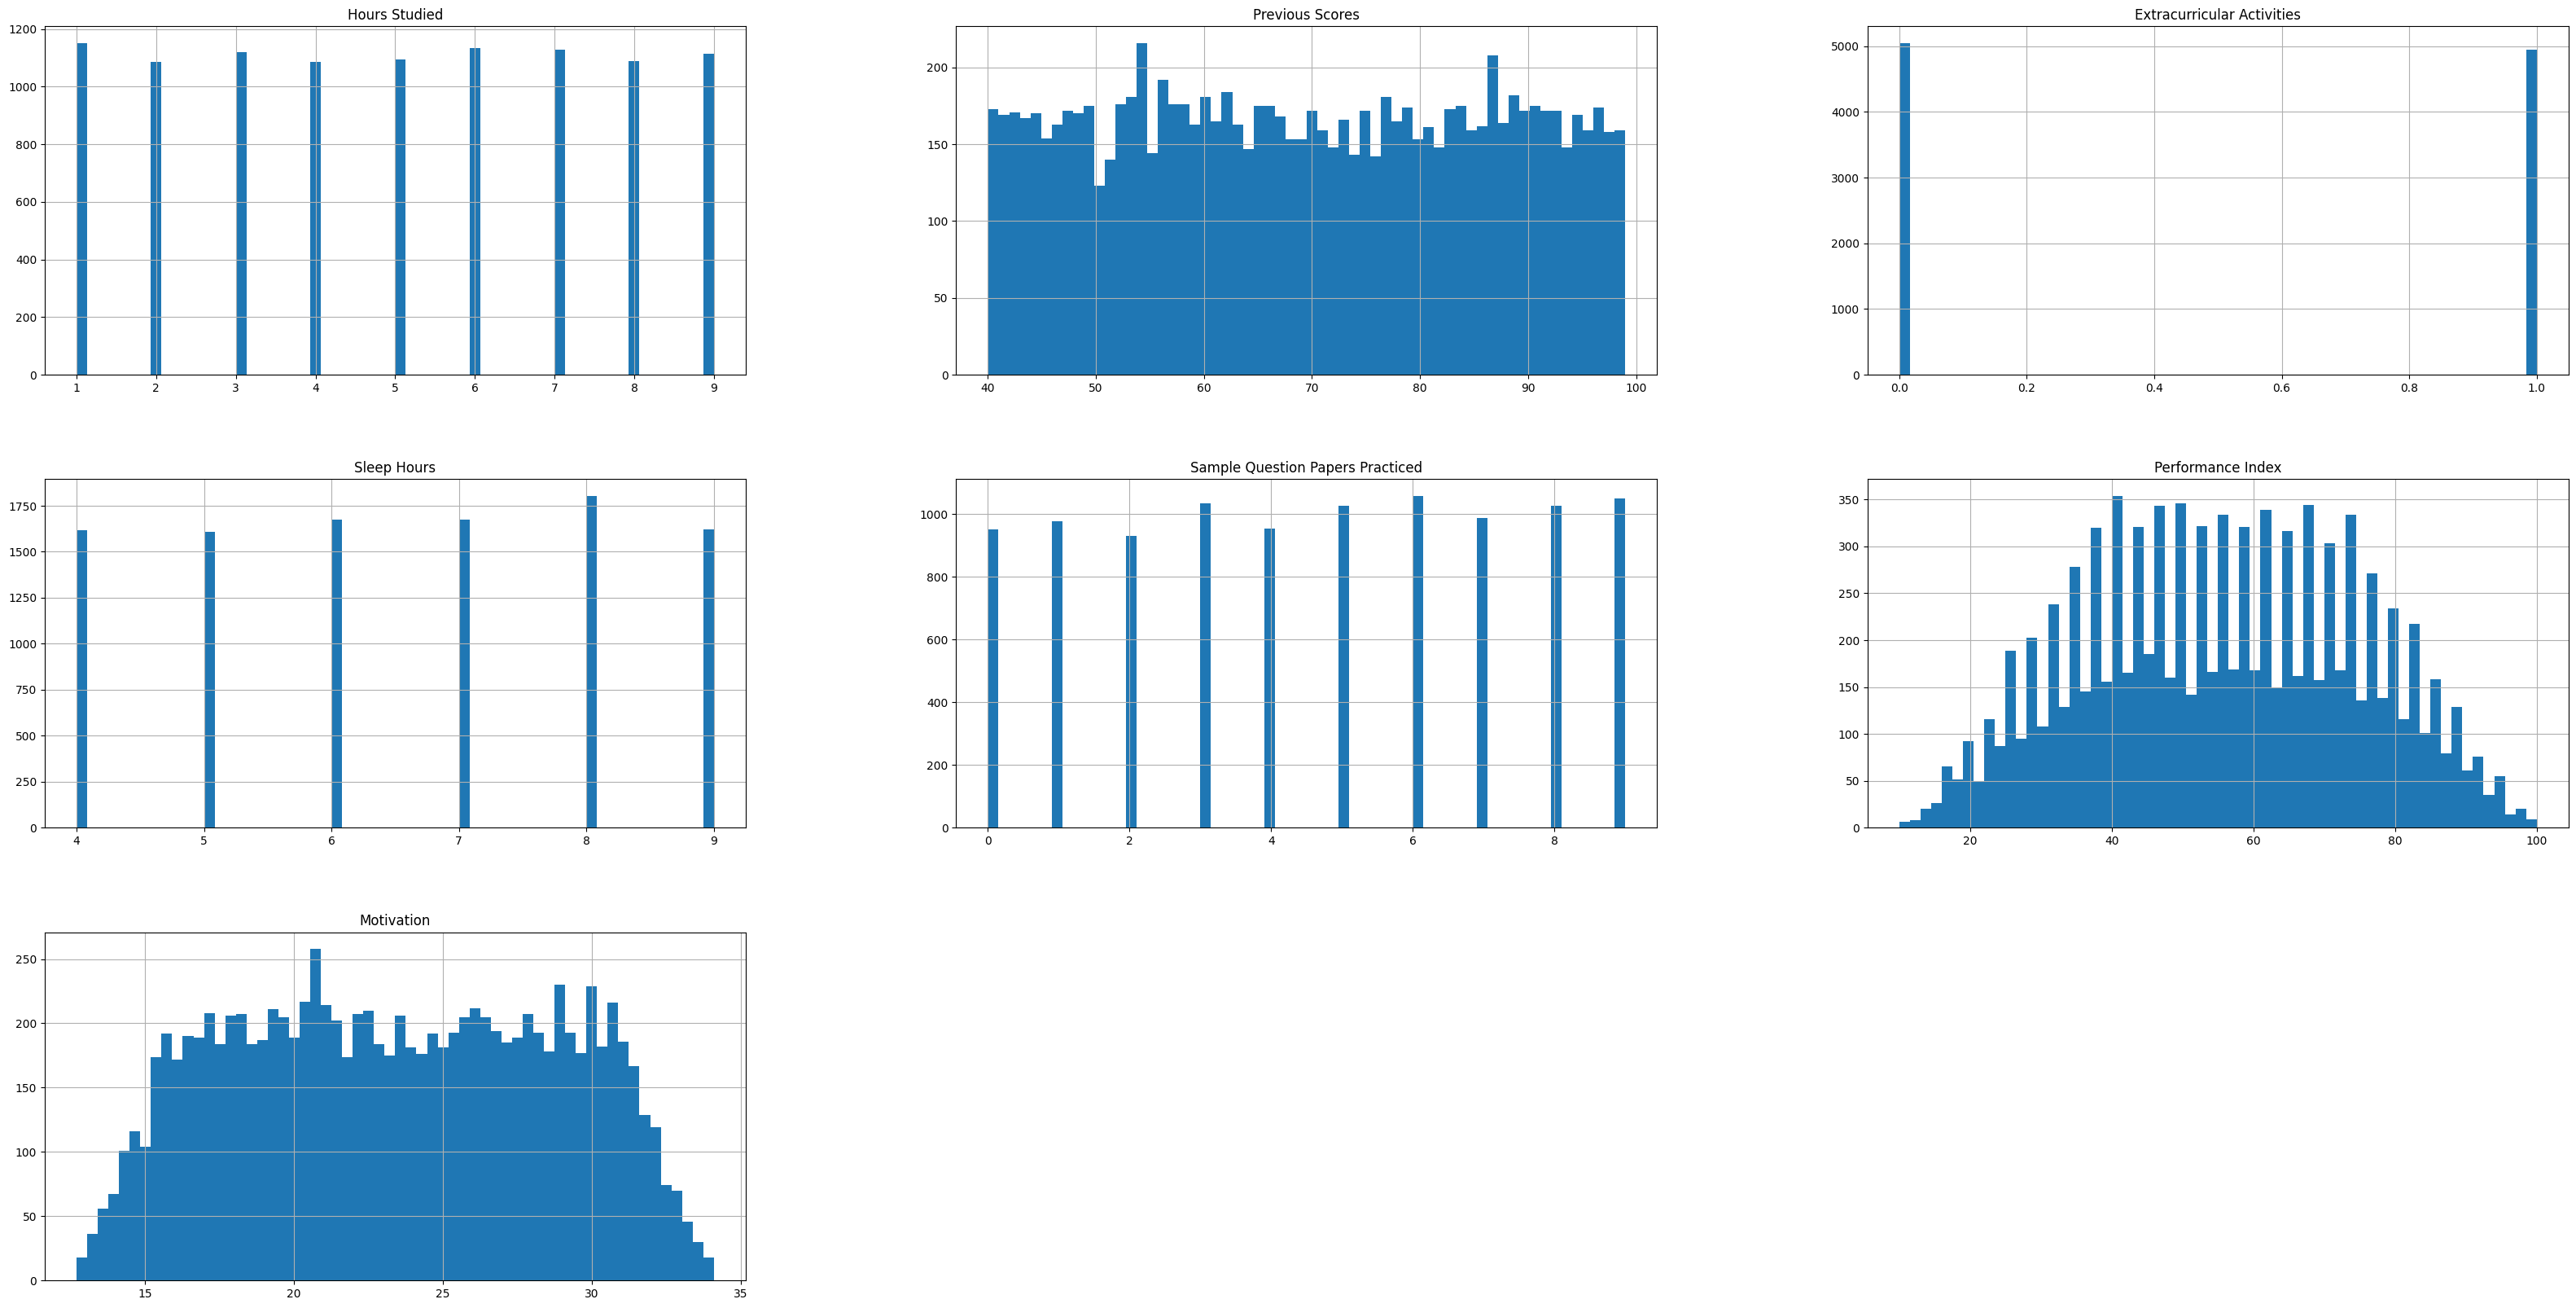

In [ ]:
df.hist(bins=60, figsize=(40, 20))

Разделите данные на обучающий и тестовый наборы данных

In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)
train_x = train.drop('Performance Index', axis=1)
train_y = train['Performance Index']
test_x = test.drop('Performance Index', axis=1)
test_y = test['Performance Index']

In [ ]:
class LinearRegression:
    def __init__(self):
      self.coefficients = None

    def fit(self, x, y):
      ones = np.ones((x.shape[0], 1))
      x = np.concatenate((ones, x), axis=1)

      x_transpose = np.transpose(x)
      XTX = np.dot(x_transpose, x)
      XTX_inv = np.linalg.inv(XTX)
      XTY = np.dot(x_transpose, y)
      self.coefficients = np.dot(XTX_inv, XTY)

    def predict(self, x):
      ones = np.ones((x.shape[0], 1))
      x = np.concatenate((ones, x), axis=1)

      return np.dot(x, self.coefficients)

    @staticmethod
    def r2_score(y_pred, y):
      ss_total = np.sum((y - np.mean(y)) ** 2)
      ss_residual = np.sum((y - y_pred) ** 2)
      r2 = 1 - ss_residual / ss_total

      return r2


Модель по всем признакам:

In [ ]:
model = LinearRegression()
model.fit(train_x, train_y)
print("R² score:", model.r2_score(model.predict(np.array(test_x)), test_y))

R² score: 0.9645589526620456


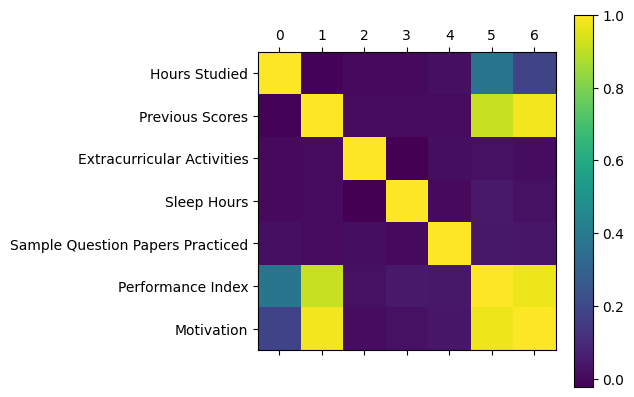

In [ ]:
plt.matshow(df.corr())
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

Выявлена корреляция целевой перменной с переменными Hours Studied и Previous Scores. Также после добавления синтетического признака к данному списку присоединился новый синтетический признак - Motivation


Модель по Hours Studied:

In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)
train_x = train['Hours Studied']
train_y = train['Performance Index']
test_x = test['Hours Studied']
test_y = test['Performance Index']

model = LinearRegression()

model.fit(np.reshape(np.array(train_x), (-1, 1)), train_y)
print("R² score:", model.r2_score(model.predict(np.reshape(np.array(test_x), (-1, 1))), test_y))

R² score: 0.1337687262999585


Модель по Previous Scores:

In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)
train_x = train['Previous Scores']
train_y = train['Performance Index']
test_x = test['Previous Scores']
test_y = test['Performance Index']

model = LinearRegression()

model.fit(np.reshape(np.array(train_x), (-1, 1)), train_y)
print("R² score:", model.r2_score(model.predict(np.reshape(np.array(test_x), (-1, 1))), test_y))

R² score: 0.8368349300897121


Модель по Motivation:

In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)
train_x = train['Motivation']
train_y = train['Performance Index']
test_x = test['Motivation']
test_y = test['Performance Index']

model = LinearRegression()

model.fit(np.reshape(np.array(train_x), (-1, 1)), train_y)
print("R² score:", model.r2_score(model.predict(np.reshape(np.array(test_x), (-1, 1))), test_y))

R² score: 0.9479176951041498


Модель по Hours Studied и Previous Scores:

In [ ]:
train = df.sample(frac=0.7, random_state=42)
test = df.drop(train.index)
train_x = train[['Previous Scores', 'Hours Studied']]
train_y = train['Performance Index']
test_x = test[['Previous Scores', 'Hours Studied']]
test_y = test['Performance Index']

model = LinearRegression()
model.fit(train_x, train_y)
print("R² score:", model.r2_score(model.predict(np.array(test_x)), test_y))

R² score: 0.9860841871867652


Вывод: результат экзамена сильно зависит от баллов, полученных учащимися на предыдущих тестах, и от среднего количества часов сна в день. Только по одному из данных признаков довольно сложно определить результат экзамена. При использовании всех имеющихся признаков у нас коэффициент детерминации максимален.
